In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle
!kaggle competitions download -c instacart-market-basket-analysis
!unzip products.csv.zip -d '/content/'
!unzip orders.csv.zip -d '/content/'
!unzip order_products__train.csv.zip -d '/content/'
!unzip order_products__prior.csv.zip -d '/content/'
!unzip aisles.csv.zip -d '/content/'
!unzip departments.csv.zip -d '/content/'

/content/gdrive/My Drive/Kaggle
products.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
aisles.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
departments.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
order_products__prior.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
order_products__train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  products.csv.zip
  inflating: /content/products.csv   
   creating: /content/__MACOSX/
  inflating: /content/__MACOSX/._products.csv  
Archive:  orders.csv.zip
  inflating: /content/orders.csv     
  inflating: /content/__MA

In [ ]:
#import of liberys
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [ ]:
#reading all csv files.
%cd "/content"
data_path="/content/"
prior_data = pd.read_csv( data_path + 'order_products__prior.csv')
train_data = pd.read_csv( data_path + 'order_products__train.csv')
orders = pd.read_csv( data_path + 'orders.csv')
products=pd.read_csv( data_path + 'products.csv')

/content


In [ ]:
avg_reordered_rate_per_order_user=pd.merge(prior_data,orders,on='order_id',how='inner')
avg_reordered_rate_per_order_user=avg_reordered_rate_per_order_user.groupby(['user_id','order_id'])['reordered'].sum().reset_index(name='count')
avg_reordered_rate_per_order_user=dict(avg_reordered_rate_per_order_user.groupby('user_id')['count'].mean().apply(int))
prior_details=pd.merge(prior_data,orders,on=['order_id'],how='inner')
prior_details=prior_details[prior_details['reordered']==1]
prior_details=prior_details.groupby(['user_id','product_id'])['reordered'].sum().reset_index(name='no of times reordered')

In [ ]:
user_ids=[]
product_list=[]
for i in tqdm(list(avg_reordered_rate_per_order_user.keys())):
  userid=i
  idx=avg_reordered_rate_per_order_user[userid]
  temp=prior_details[prior_details['user_id']==userid].sort_values(by=['no of times reordered']).tail(idx)
  t1=list(temp['product_id'])
  if len(t1)==0:
    product_list.append(['None'])
  else:
    s=[str(i) for i in t1]
    product_list.append([(" ".join(s))])
  user_ids.append(i)
First_cut=pd.DataFrame()
First_cut['user_id']=user_ids
First_cut['products']=product_list
test_orders=orders[orders['eval_set']=='test']
First_cut=pd.merge(First_cut,test_order,on=['user_id'],how='inner')[['user_id','products']]
First_cut.to_csv('First_cut.csv',index=False)

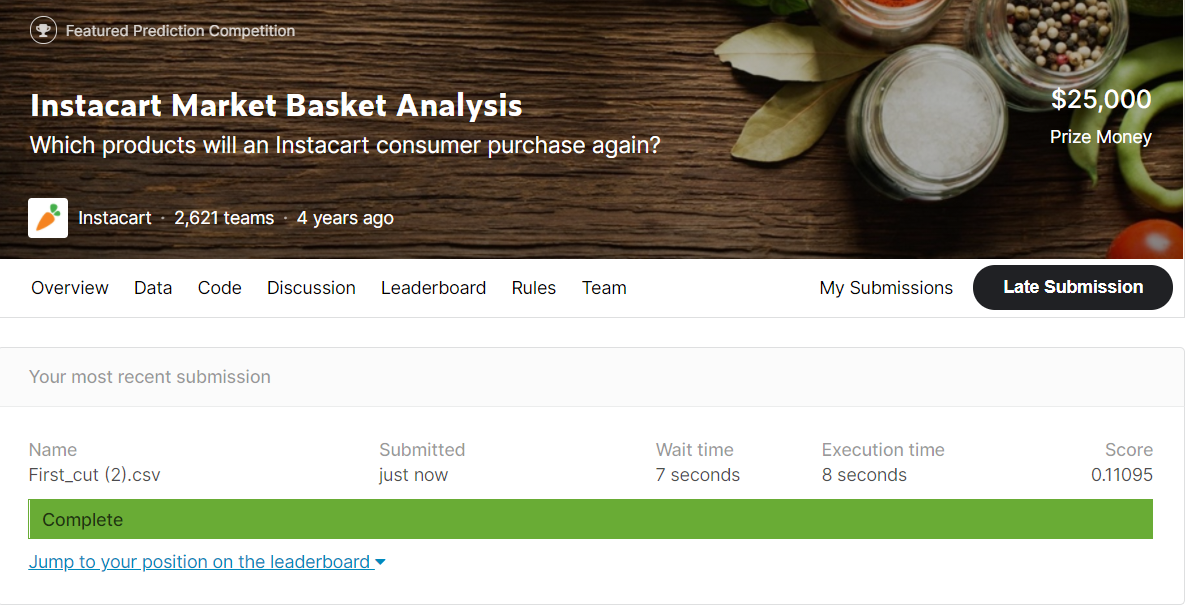